In [22]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
pd.set_option('display.max_columns', 50)

In [4]:
songs = pd.read_csv('data/playlists1.csv')

In [5]:
songs.head()

,album,artistPrimary,artists,id,songLength,title,year,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,genre
0,Enta da Stage,Black Moon,Black Moon,6Xio661Y2iL7SDKFFOG9cv,270066,Who Got Da Props,1993,0.1380,https://api.spotify.com/v1/audio-analysis/6Xio...,0.805,270067,0.653,0.000000,8,0.100,-11.251,0,0.185,100.349,4,https://api.spotify.com/v1/tracks/6Xio661Y2iL7...,audio_features,spotify:track:6Xio661Y2iL7SDKFFOG9cv,0.257,Boom Bap
1,Dead Serious,Das EFX,Das EFX,5Zo9KsvmGsFHfwA1zlKv6M,295373,Mic Checka,1992,0.0636,https://api.spotify.com/v1/audio-analysis/5Zo9...,0.720,295373,0.626,0.000000,7,0.114,-13.758,1,0.363,92.224,4,https://api.spotify.com/v1/tracks/5Zo9KsvmGsFH...,audio_features,spotify:track:5Zo9KsvmGsFHfwA1zlKv6M,0.519,Boom Bap
2,The Sun Rises In The East,Jeru The Damaja,Jeru The Damaja,4kH2kmDkBe2fGIyPQnv3L5,297040,Come Clean - E New Y Radio,1994,0.6240,https://api.spotify.com/v1/audio-analysis/4kH2...,0.794,297040,0.772,0.000041,10,0.114,-13.957,0,0.327,87.546,4,https://api.spotify.com/v1/tracks/4kH2kmDkBe2f...,audio_features,spotify:track:4kH2kmDkBe2fGIyPQnv3L5,0.597,Boom Bap
3,Illmatic XX,Nas,Nas,5FHXxdJeq1iAE9PjDTEgyd,290573,The World Is Yours,1994,0.2740,https://api.spotify.com/v1/audio-analysis/5FHX...,0.678,290573,0.794,0.000002,10,0.124,-6.186,0,0.140,87.374,4,https://api.spotify.com/v1/tracks/5FHXxdJeq1iA...,audio_features,spotify:track:5FHXxdJeq1iAE9PjDTEgyd,0.540,Boom Bap
4,Enter The Wu-Tang (36 Chambers) [Expanded Edit...,Wu-Tang Clan,Wu-Tang Clan,119c93MHjrDLJTApCVGpvx,252186,C.R.E.A.M.,1993,0.5700,https://api.spotify.com/v1/audio-analysis/119c...,0.479,252187,0.549,0.023900,11,0.127,-10.551,0,0.373,180.985,4,https://api.spotify.com/v1/tracks/119c93MHjrDL...,audio_features,spotify:track:119c93MHjrDLJTApCVGpvx,0.576,Boom Bap


In [78]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
           'key', 'liveness', 'mode', 'speechiness', 'tempo', 'valence']
songs_trim = songs.loc[:, columns]

In [79]:
songs['cluster'] = KMeans(n_clusters=3).fit_predict(songs_trim)

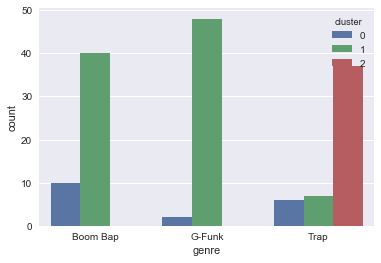

In [80]:
sns.countplot(x='genre', hue='cluster', data=songs)

In [81]:
songs.loc[(songs.genre == 'Trap') & (songs.cluster != 2), ['artistPrimary', 'title', 'genre', 'cluster']]

,artistPrimary,title,genre,cluster
102,Lil Uzi Vert,XO TOUR Llif3,Trap,0
103,Offset,Ric Flair Drip (& Metro Boomin),Trap,1
110,Yo Gotti,Juice,Trap,0
112,OutKast,Decatur Psalm,Trap,1
113,2 Chainz,4 AM,Trap,1
115,Rich The Kid,Plug Walk,Trap,1
116,YBN Nahmir,Bounce Out With That,Trap,1
122,Kodak Black,Tunnel Vision,Trap,0
135,Tay-K,The Race - Remix,Trap,0
140,21 Savage,Bank Account,Trap,1


In [83]:
songs.loc[(songs.genre == 'G-Funk') & (songs.cluster == 0), ['artistPrimary', 'title', 'genre', 'cluster']]

,artistPrimary,title,genre,cluster
53,Above The Law,Black Superman,G-Funk,0
70,Eazy-E,Real Muthaphuckkin' G's,G-Funk,0


In [84]:
songs.loc[(songs.genre == 'Boom Bap') & (songs.cluster == 0), ['artistPrimary', 'title', 'genre', 'cluster']]

,artistPrimary,title,genre,cluster
4,Wu-Tang Clan,C.R.E.A.M.,Boom Bap,0
12,Group Home,Tha Realness,Boom Bap,0
17,AZ,Sugar Hill,Boom Bap,0
18,Big L,98 Freestyle,Boom Bap,0
25,Capone-N-Noreaga,T.O.N.Y. (Top Of New York),Boom Bap,0
31,Kool G Rap & DJ Polo,Ill Street Blues,Boom Bap,0
32,Lost Boyz,"Jeeps, Lex Coups, Bimaz & Benz",Boom Bap,0
37,Craig Mack,Flava In Ya Ear Remix - feat. Notorious B.I.G....,Boom Bap,0
45,Smif-N-Wessun,Sound Bwoy Bureill,Boom Bap,0
46,Organized Konfusion,Stress,Boom Bap,0


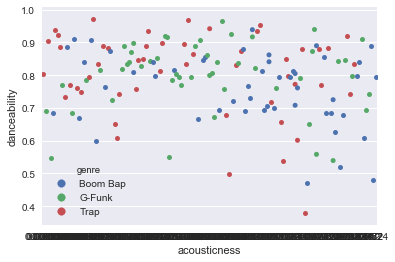

In [85]:
sns.swarmplot(x='acousticness', y='danceability', hue='genre', data=songs)

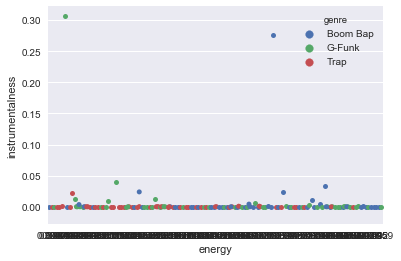

In [86]:
sns.swarmplot(x='energy', y='instrumentalness', hue='genre', data=songs)

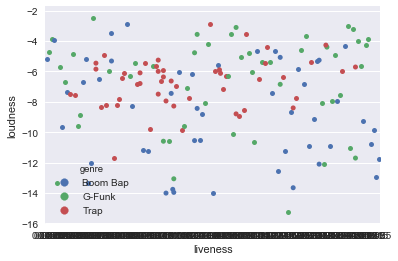

In [88]:
sns.swarmplot(x='liveness', y='loudness', hue='genre', data=songs)

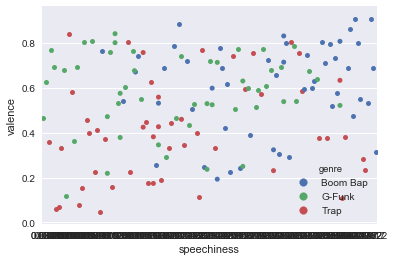

In [89]:
sns.swarmplot(x='speechiness', y='valence', hue='genre', data=songs)